# Bank Marketing Campaign
### Reza Afriansyah - JCDS 3004

## Business Problem Understanding

**Context**
Sebuah bank sedang melakukan kampanye pemasaran untuk menarik nasabah membuka produk term deposit. Term deposit adalah produk simpanan berjangka di mana nasabah menyimpan sejumlah uang untuk jangka waktu tertentu, dan akan menerima bunga tetap sesuai nominal yang disetorkan.

Untuk mendapatkan nasabah baru, bank melakukan berbagai upaya pemasaran seperti menghubungi calon nasabah via telepon, email, atau tatap muka. Namun, tidak semua calon nasabah yang dihubungi tertarik untuk membuka deposito. Proses kampanye ini memerlukan biaya dan waktu, sehingga penting bagi bank untuk mengetahui nasabah mana yang berpotensi membuka deposito agar sumber daya dapat digunakan secara efektif.

Data yang dimiliki bank mencakup profil nasabah (usia, pekerjaan, saldo, pinjaman, dll.) dan informasi terkait kampanye pemasaran (jenis kontak, bulan terakhir kontak, jumlah kontak, hasil kampanye sebelumnya, dll.).

Target:

0 : Nasabah tidak membuka deposito

1 : Nasabah membuka deposito

**Problem Statement :**

Proses pemasaran deposito membutuhkan biaya besar, terutama jika bank menargetkan semua calon nasabah tanpa penyaringan. Banyaknya calon nasabah yang dihubungi tetapi tidak tertarik membuka deposito menyebabkan pemborosan sumber daya.

Bank ingin meningkatkan efektivitas kampanye dengan memprediksi nasabah mana yang kemungkinan besar akan membuka deposito, sehingga kampanye dapat difokuskan pada target yang tepat dan meminimalkan biaya pemasaran yang sia-sia.

**Goals**

- Membuat model prediktif untuk mengklasifikasikan apakah seorang nasabah akan membuka deposito atau tidak.

- Mengidentifikasi faktor-faktor yang paling memengaruhi keputusan nasabah untuk membuka deposito, sehingga strategi pemasaran bisa diarahkan secara lebih efektif.

**Analytic Approach**

- Melakukan eksplorasi data (EDA) untuk memahami distribusi data, pola, dan faktor-faktor yang berpengaruh terhadap keputusan membuka deposito.

- Membangun model klasifikasi untuk memprediksi probabilitas seorang nasabah membuka deposito.

- Mengevaluasi performa model menggunakan metrik yang tepat untuk meminimalkan kerugian akibat salah sasaran kampanye.


**Metric Evaluation**

- Type 1 error (False Positive)
Model memprediksi nasabah akan membuka deposito, tetapi ternyata tidak.

Konsekuensi: Biaya kampanye terbuang untuk calon nasabah yang tidak tertarik.

- Type 2 error (False Negative)
Model memprediksi nasabah tidak akan membuka deposito, tetapi ternyata membuka.

Konsekuensi: Kehilangan peluang mendapatkan nasabah baru dan potensi pendapatan bunga.

# Data Understanding

### Informasi Atribut

**Customer Profile**
| Atribut  | Tipe Data, Panjang | Deskripsi |
| --- | --- | --- |
| age | Integer | Usia nasabah |
| job | Teks | Pekerjaan nasabah (misalnya: admin, blue-collar, entrepreneur, dll.) |
| balance | Integer | Saldo rata-rata nasabah di rekening (dalam satuan mata uang bank) |
| housing | Teks | Status kepemilikan pinjaman rumah ("yes" jika ada, "no" jika tidak) |
| loan | Teks | Status kepemilikan pinjaman pribadi ("yes" jika ada, "no" jika tidak) |

**Marketing Data**
| Atribut  | Tipe Data, Panjang | Deskripsi |
| --- | --- | --- |
| contact | Teks | Jenis kontak yang digunakan saat kampanye (misalnya: cellular, telephone) |
| month | Teks | Bulan terakhir kontak dilakukan pada tahun tersebut |
| campaign | Integer | Jumlah kontak yang dilakukan selama kampanye ini untuk nasabah tersebut |
| pdays | Integer | Jumlah hari sejak nasabah terakhir dihubungi dari kampanye sebelumnya (-1 jika belum pernah dihubungi) |
| poutcome | Teks | Hasil dari kampanye pemasaran sebelumnya (misalnya: success, failure, unknown) |
| deposit | Kategorikal (Yes/No) | Target – Apakah nasabah membuka deposito berjangka setelah kampanye |


In [1]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, RobustScaler, Binarizer
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
# load dataset
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [3]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


<Axes: >

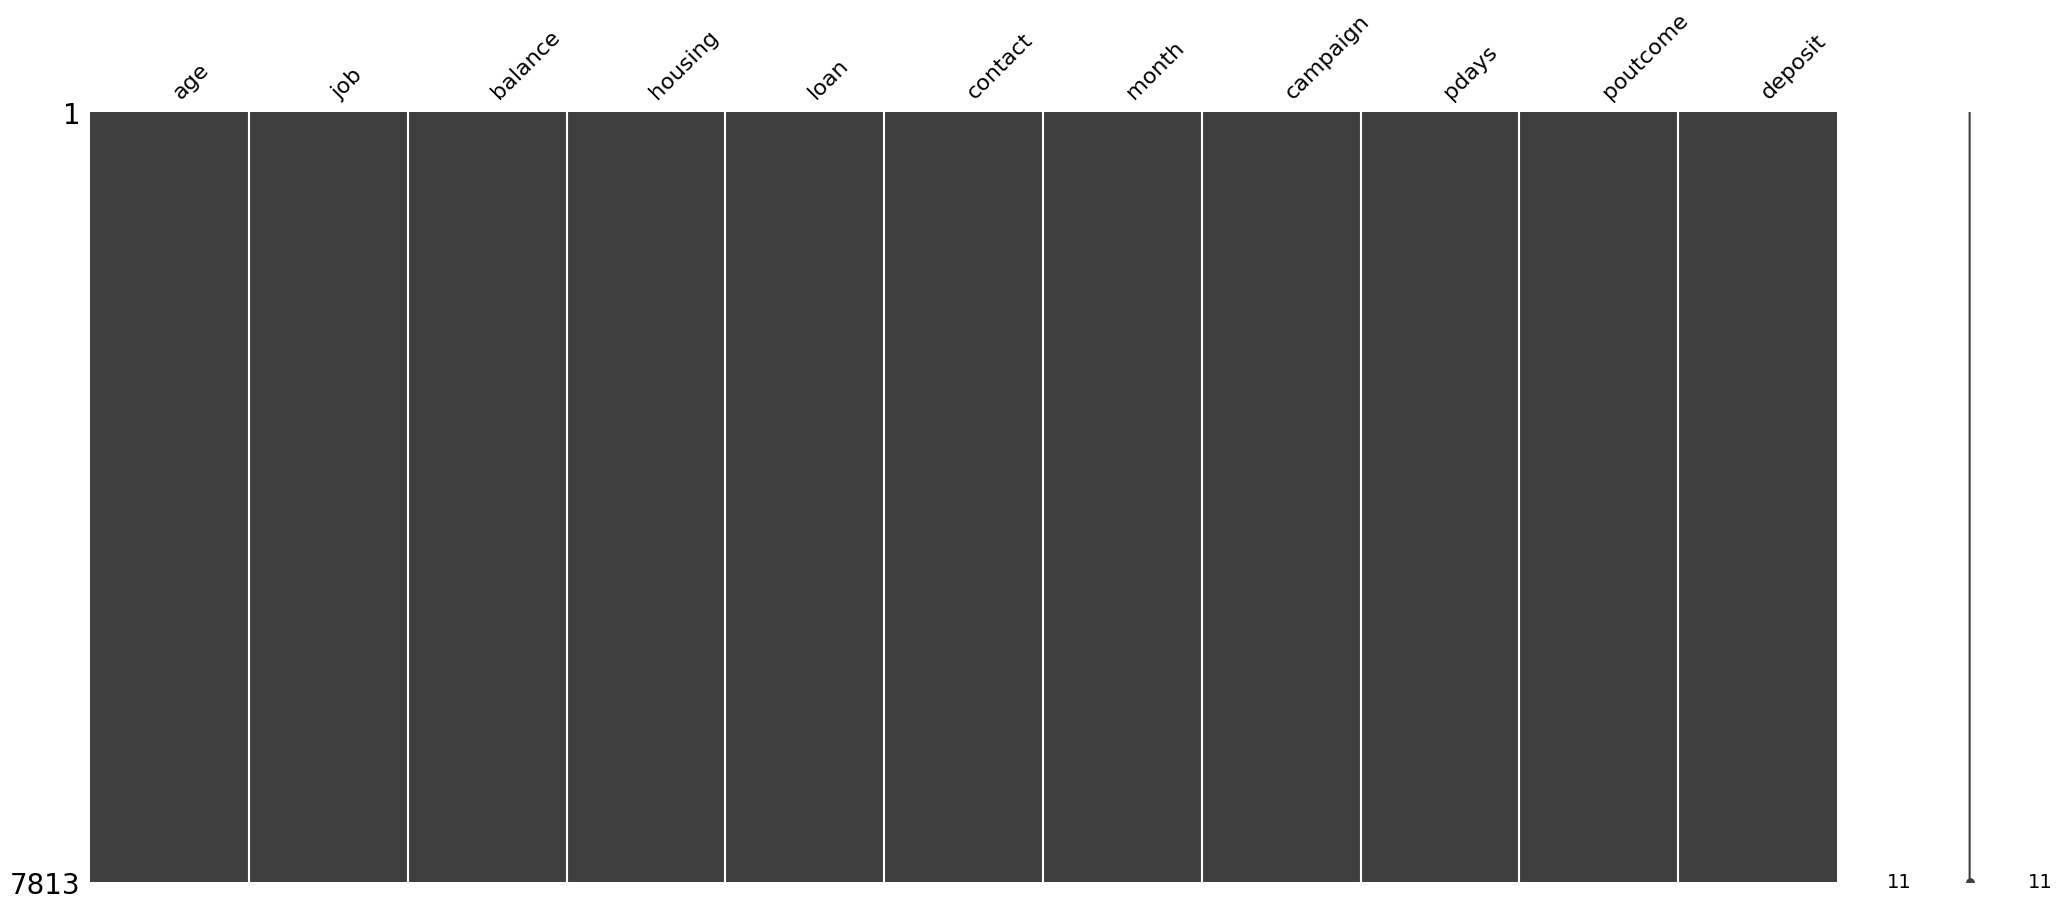

In [4]:
missingno.matrix(df)

Tidak terdapat nilai kosong atau **Missing Value** disetiap baris datanya

## Data Cleaning

In [5]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,75,"[88, 42]"
1,job,object,0,0.0,12,"[blue-collar, student]"
2,balance,int64,0,0.0,3153,"[3324, 1309]"
3,housing,object,0,0.0,2,"[no, yes]"
4,loan,object,0,0.0,2,"[yes, no]"
5,contact,object,0,0.0,3,"[telephone, unknown]"
6,month,object,0,0.0,12,"[jan, mar]"
7,campaign,int64,0,0.0,32,"[15, 9]"
8,pdays,int64,0,0.0,422,"[344, 221]"
9,poutcome,object,0,0.0,4,"[failure, other]"


In [6]:
# data duplik
df.duplicated().sum()

np.int64(8)

Terdapat 8 Data duplikat dan terlihat sedikit sehingga bisa dihapus

In [7]:
# Hapus data duplikat
df.drop_duplicates(inplace=True)

Data **Duplikat** telah dihapus

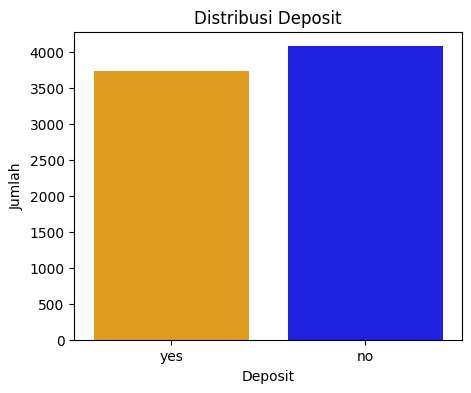

In [8]:
# Lihat distribusi Deposit
df['deposit'] = df['deposit'].str.strip().str.lower()

plt.figure(figsize=(5,4))
sns.countplot(data=df, x='deposit', palette={'yes':'orange', 'no':'blue'})
plt.title('Distribusi Deposit')
plt.xlabel('Deposit')
plt.ylabel('Jumlah')
plt.show()


Pada Target Deposit ini data terlihat hampir seimbang sehingga tidak perlu resampling data.

In [9]:
df.describe()

,age,balance,campaign,pdays
count,7805.000000,7805.000000,7805.000000,7805.000000
mean,41.257783,1513.968225,2.520564,51.462268
std,11.922833,3090.508938,2.728204,108.115084
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,128.000000,1.000000,-1.000000
50%,39.000000,550.000000,2.000000,-1.000000
75%,49.000000,1685.000000,3.000000,41.000000
max,95.000000,66653.000000,63.000000,854.000000


Kolom `pdays` sebaiknya diubah menjadi `pdays_contacted_before` karena nilai `-1` pada pdays selalu berkorelasi dengan `poutcome = "unknown"`, yang secara jelas menunjukkan bahwa nasabah belum pernah dihubungi pada kampanye sebelumnya. Jika dibiarkan dalam bentuk numerik, nilai `-1` dapat disalahartikan oleh model sebagai jarak waktu kontak yang sangat singkat, padahal sebenarnya merepresentasikan status “tidak pernah dihubungi”. Dengan mengubahnya menjadi kategori seperti “Pernah” dan “Tidak Pernah”, informasi menjadi lebih jelas, mudah diinterpretasikan, dan membantu model memisahkan perilaku nasabah berdasarkan riwayat kontak sebelumnya secara lebih akurat.

In [10]:
# Jika pdays == -1 → Tidak Pernah, selain itu → Pernah
df['pdays'] = df['pdays'].apply(lambda x: 'Tidak Pernah' if x == -1 else 'Pernah')

# Ubah jadi kategori dengan urutan tetap
df['pdays'] = pd.Categorical(df['pdays'], categories=['Tidak Pernah', 'Pernah'])

# Cek hasil
print(df['pdays'].value_counts(dropna=False))


pdays
Tidak Pernah    5809
Pernah          1996
Name: count, dtype: int64


Bisa dilihat bahwa customer lebih banyak tidak pernah di hubungi oleh client di campaign sebelumnya

Ubah isi data Deposit
0 : Tidak Deposit
1 : Deposit

In [11]:
df['deposit'] = df['deposit'].astype(str).map({'no': 0, 'yes': 1}).astype(int)

In [12]:
# deskrip object
df.describe(include='object')

,job,housing,loan,contact,month,poutcome
count,7805,7805,7805,7805,7805,7805
unique,12,2,2,3,12,4
top,management,no,no,cellular,may,unknown
freq,1789,4136,6781,5623,1973,5811


Kesimpulan umum
- Dataset relatif seimbang pada target (deposit), meski “no” sedikit lebih banyak dari “yes”.
- Nasabah kebanyakan tidak memiliki pinjaman dan tidak memiliki kredit rumah.
- Mayoritas dihubungi via ponsel, terutama pada bulan Mei.
- Banyak nasabah yang tidak punya riwayat kampanye sebelumnya (poutcome = unknown).

## Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7805 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       7805 non-null   int64   
 1   job       7805 non-null   object  
 2   balance   7805 non-null   int64   
 3   housing   7805 non-null   object  
 4   loan      7805 non-null   object  
 5   contact   7805 non-null   object  
 6   month     7805 non-null   object  
 7   campaign  7805 non-null   int64   
 8   pdays     7805 non-null   category
 9   poutcome  7805 non-null   object  
 10  deposit   7805 non-null   int64   
dtypes: category(1), int64(4), object(6)
memory usage: 678.5+ KB


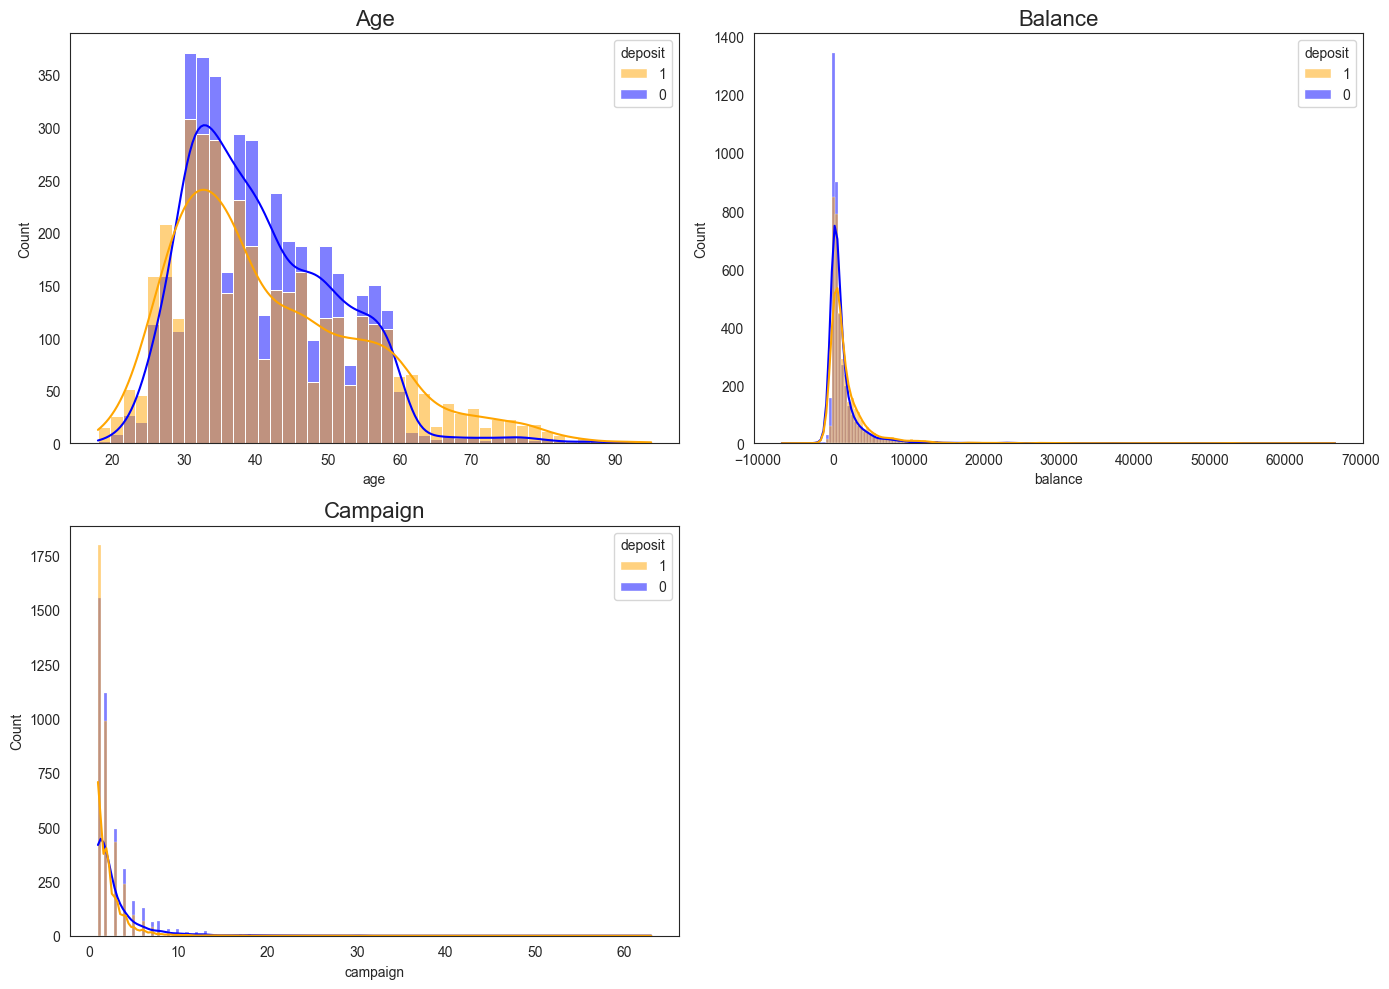

In [14]:
plt.figure(figsize=(14, 10))
sns.set_style("white") 

# Mapping warna dengan key string
palette_colors = {'0': 'blue', '1': 'orange'}

# Histogram Age
plt.subplot(221)
sns.histplot(data=df, x='age', hue=df['deposit'].astype(str), kde=True, palette=palette_colors)
plt.title('Age', fontsize=16)

# Histogram Balance
plt.subplot(222)
sns.histplot(data=df, x='balance', hue=df['deposit'].astype(str), kde=True, palette=palette_colors)
plt.title('Balance', fontsize=16)

# Histogram Campaign
plt.subplot(223)
sns.histplot(data=df, x='campaign', hue=df['deposit'].astype(str), kde=True, palette=palette_colors)
plt.title('Campaign', fontsize=16)

# Kosongkan subplot ke-4
plt.subplot(224)
plt.axis('off')

plt.tight_layout()
plt.show()


Terlihat bahwa nasabah yang melakukan deposit umumnya berada pada rentang usia 30–40 tahun, sedangkan saldo dan jumlah kontak kampanye memiliki pola yang mirip antara yang melakukan deposit maupun tidak, sehingga kemungkinan kedua variabel tersebut kurang berpengaruh signifikan terhadap keputusan deposit.

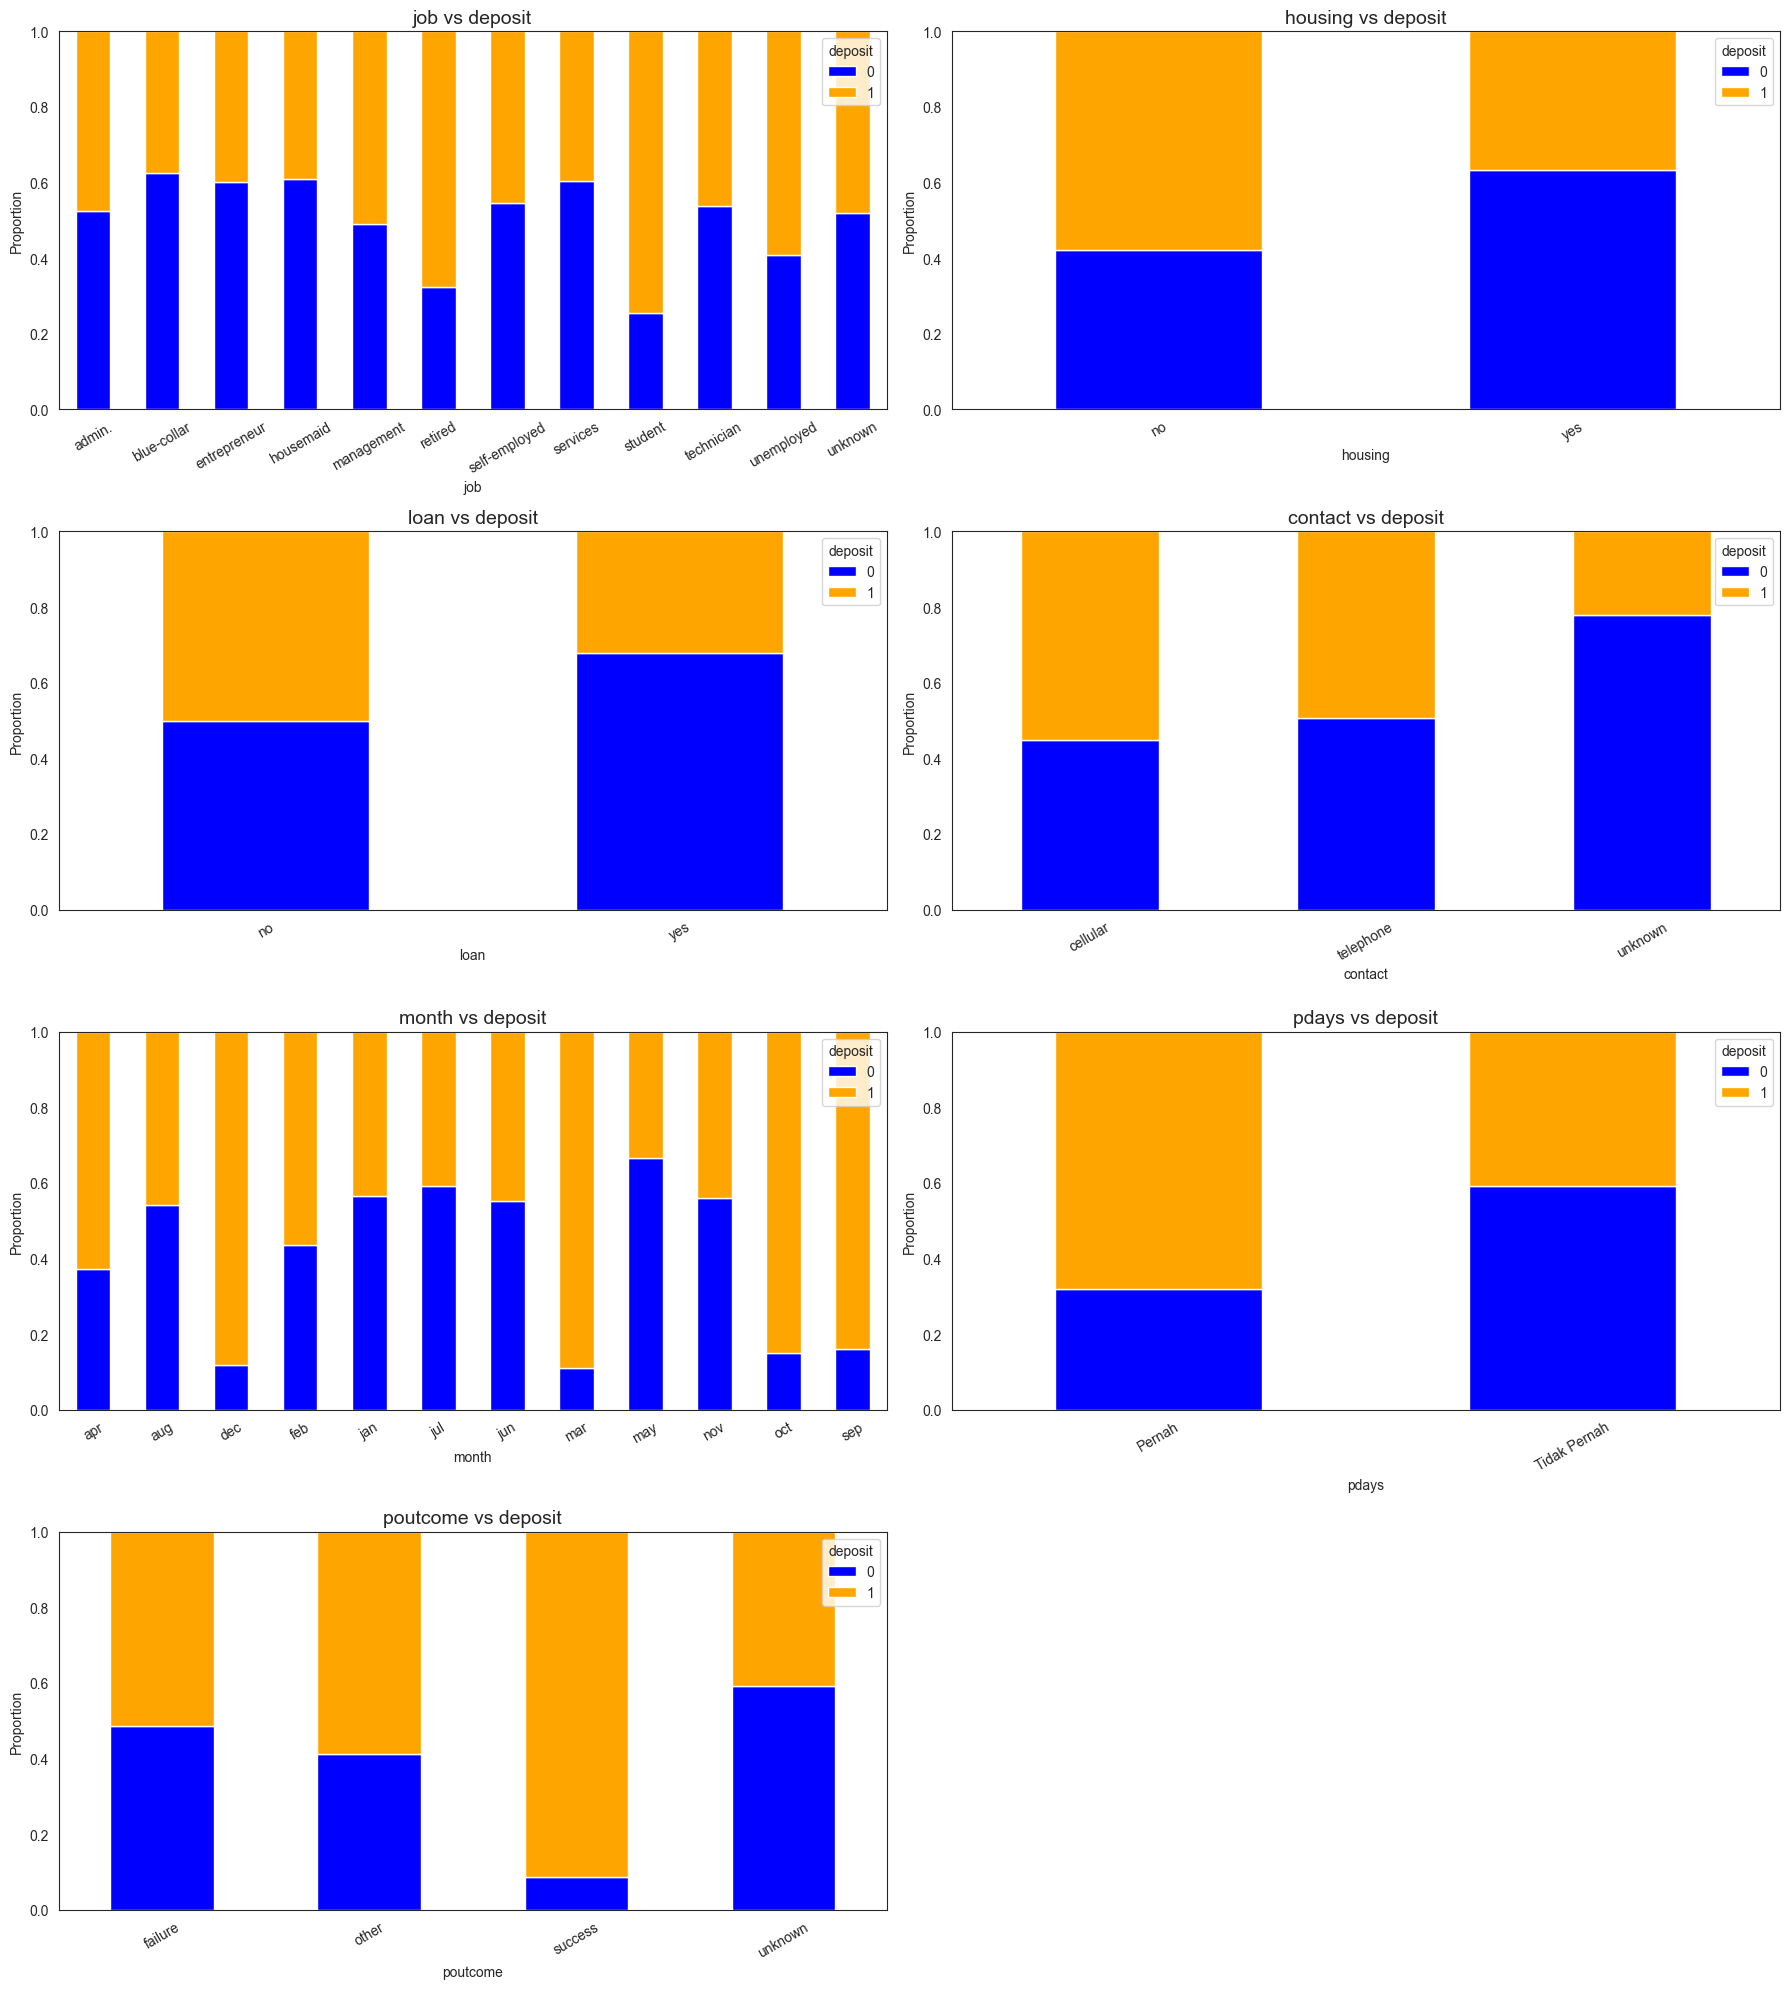

In [15]:
cols = ['job', 'housing', 'loan', 'contact', 'month', 'pdays', 'poutcome']

# Mapping warna
colors = {1: 'orange', 0: 'blue'}
deposit_labels = {1: '1', 0: '0'}

# Pastikan deposit integer
df['deposit'] = df['deposit'].astype(int)

# Tambahkan kategori "Unknown" jika kategorikal
for c in cols:
    if pd.api.types.is_categorical_dtype(df[c]):
        if 'Unknown' not in df[c].cat.categories:
            df[c] = df[c].cat.add_categories(['Unknown'])

# Matikan grid
plt.rcParams['axes.grid'] = False

# Plot
fig = plt.figure(figsize=(18, 20))
nrows, ncols = 4, 2

for idx, col in enumerate(cols, start=1):
    ax = plt.subplot(nrows, ncols, idx)

    ct = pd.crosstab(
        df[col].fillna('Unknown').astype(str),
        df['deposit'],
        normalize=0
    )

    ct.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        color=[colors[key] for key in ct.columns]
    )

    ax.set_title(f'{col} vs deposit', fontsize=14)
    ax.set_ylabel('Proportion')
    ax.set_xlabel(col)
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', labelrotation=30)
    ax.legend(
        [deposit_labels[key] for key in ct.columns],
        title='deposit',
        loc='upper right'
    )

# Kosongkan slot subplot yang tidak terisi
total_slots = nrows * ncols
for k in range(len(cols) + 1, total_slots + 1):
    ax = plt.subplot(nrows, ncols, k)
    ax.axis('off')

fig.tight_layout()
plt.show()


In [16]:
cols = ['job', 'housing', 'loan', 'contact', 'month', 'pdays', 'poutcome']

# Pastikan deposit integer
df['deposit'] = df['deposit'].astype(int)

for col in cols:
    if col not in df.columns:
        continue

    # Crosstab proporsi
    prop_df = (
        df.groupby(col)['deposit']
        .value_counts(normalize=True)
        .unstack(fill_value=0)  # kolom jadi 0 dan 1
    )

    # Ganti nama kolom
    prop_df.columns = [0.0, 1.0]

    # Urutkan berdasarkan proporsi 1.0 tertinggi
    prop_df = prop_df.sort_values(by=1.0, ascending=False)

    # Set nama index & kolom sesuai format contoh
    prop_df.index.name = col
    prop_df.columns.name = 'target'

    display(prop_df)


target,0.0,1.0
job,,
student,0.255061,0.744939
retired,0.324074,0.675926
unemployed,0.409639,0.590361
management,0.489659,0.510341
unknown,0.518519,0.481481
admin.,0.525641,0.474359
technician,0.538402,0.461598
self-employed,0.546429,0.453571
entrepreneur,0.601695,0.398305


target,0.0,1.0
housing,,
no,0.422631,0.577369
yes,0.634233,0.365767


target,0.0,1.0
loan,,
no,0.498599,0.501401
yes,0.677734,0.322266


target,0.0,1.0
contact,,
cellular,0.448871,0.551129
telephone,0.505495,0.494505
unknown,0.779340,0.220660


target,0.0,1.0
month,,
mar,0.110553,0.889447
dec,0.117647,0.882353
oct,0.150350,0.849650
sep,0.160377,0.839623
apr,0.373112,0.626888
feb,0.436330,0.563670
aug,0.542091,0.457909
jun,0.550758,0.449242
nov,0.558600,0.441400


target,0.0,1.0
pdays,,
Pernah,0.319138,0.680862
Tidak Pernah,0.591840,0.408160
Unknown,0.000000,0.000000


target,0.0,1.0
poutcome,,
success,0.085414,0.914586
other,0.412987,0.587013
failure,0.487028,0.512972
unknown,0.591637,0.408363


Berdasarkan barplot dan tabel di atas, kita dapat menyimpulkan:
- Nasabah dengan pekerjaan student memiliki proporsi pembukaan deposito tertinggi, diikuti oleh retired dan unemployed, sedangkan blue-collar paling rendah.
- Nasabah yang tidak memiliki kredit rumah (housing = no) lebih banyak membuka deposito dibandingkan yang memiliki kredit rumah.
- Nasabah yang tidak memiliki pinjaman pribadi (loan = no) sedikit lebih cenderung membuka deposito dibandingkan yang memiliki pinjaman pribadi.
- Kontak melalui cellular memiliki tingkat keberhasilan lebih tinggi dibandingkan telephone, sedangkan unknown jauh lebih rendah keberhasilannya.
- Bulan Maret, Desember, dan Oktober memiliki proporsi pembukaan deposito tertinggi, sedangkan Mei terendah.
- Nasabah yang pernah dihubungi sebelumnya (pdays = Pernah) memiliki peluang membuka deposito lebih besar dibandingkan yang tidak pernah dihubungi sebelumnya.
- Hasil kampanye sebelumnya yang success memberikan pengaruh paling besar terhadap pembukaan deposito, diikuti oleh other dan failure, sedangkan unknown paling rendah.

## Data Preparation

In [17]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,Tidak Pernah,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,Tidak Pernah,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,Pernah,other,1
3,38,services,-87,yes,no,cellular,may,1,Tidak Pernah,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,Tidak Pernah,unknown,0


In [18]:
df.describe()

,age,balance,campaign,deposit
count,7805.000000,7805.000000,7805.000000,7805.000000
mean,41.257783,1513.968225,2.520564,0.477899
std,11.922833,3090.508938,2.728204,0.499543
min,18.000000,-6847.000000,1.000000,0.000000
25%,32.000000,128.000000,1.000000,0.000000
50%,39.000000,550.000000,2.000000,0.000000
75%,49.000000,1685.000000,3.000000,1.000000
max,95.000000,66653.000000,63.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7805 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       7805 non-null   int64   
 1   job       7805 non-null   object  
 2   balance   7805 non-null   int64   
 3   housing   7805 non-null   object  
 4   loan      7805 non-null   object  
 5   contact   7805 non-null   object  
 6   month     7805 non-null   object  
 7   campaign  7805 non-null   int64   
 8   pdays     7805 non-null   category
 9   poutcome  7805 non-null   object  
 10  deposit   7805 non-null   int64   
dtypes: category(1), int64(4), object(6)
memory usage: 678.5+ KB


In [20]:
df['pdays'].unique()

['Tidak Pernah', 'Pernah']
Categories (3, object): ['Tidak Pernah', 'Pernah', 'Unknown']

### Encoding & Scaling

Sekarang mari kita melakukan fitur encoding untuk fitur-fitur kategorikal dan sacling pada fitur-fitur numerikal yang kita miliki.
Yang akan kita lakukan adalah:

1. Merubah fitur/kolom `job` menggunakan `One Hot Encoding`, karena fitur ini tidak memiliki urutan (non-ordinal) dan jumlah unique datanya relatif sedikit sehingga OHE lebih aman digunakan agar model tidak salah menganggap ada hubungan antar kategori pekerjaan.
2. Merubah fitur/kolom `housing` menggunakan `One Hot Encoding`, karena fitur ini hanya memiliki dua kategori (yes dan no) dan tidak memiliki urutan. Sebenarnya bisa juga langsung diubah menjadi biner 0–1, namun untuk konsistensi kita gunakan OHE.
3. Merubah fitur/kolom `loan` menggunakan One `Hot Encoding`, karena sama seperti housing, hanya memiliki dua kategori (yes dan no) dan tidak memiliki urutan.
4. Merubah fitur/kolom `contact` menggunakan `One Hot Encoding`, karena fitur ini tidak memiliki urutan (non-ordinal) dan jumlah unique datanya sedikit.
5. Merubah fitur/kolom `month` menggunakan `One Hot Encoding`, walaupun secara alami bulan memiliki urutan waktu, dalam konteks model ini nilainya bersifat label dan jarak antar bulan tidak linear, sehingga OHE lebih aman digunakan.
6. Merubah fitur/kolom `pdays` menggunakan `One Hot Encoding`, karena setelah kita ubah menjadi kategori Tidak Pernah dan Pernah, nilainya (0 = Tidak Pernah, 1 = Pernah).
7. Merubah fitur/kolom `poutcome` menggunakan `One Hot Encoding`, karena fitur ini tidak memiliki urutan (non-ordinal) dan jumlah unique datanya sedikit (success, failure, other, unknown).
8. Melakukan Standard Scaling pada kolom `age`, karena distribusi umur relatif mendekati normal (mean sekitar 41, std ≈ 12). StandardScaler akan mengubah data menjadi mean = 0 dan standar deviasi = 1, cocok untuk fitur yang distribusinya relatif Gaussian.
9. Melakukan Robust Scaling pada kolom `balance`, karena nilai balance memiliki outlier besar (min: -6847, max: 66653). RobustScaler menggunakan median dan IQR, sehingga lebih tahan terhadap pengaruh outlier dibanding StandardScaler.
10. Melakukan Robust Scaling pada kolom `campaign`, karena distribusinya sangat condong (skewed) dan memiliki outlier (max: 63). RobustScaler membantu menjaga skala tanpa terdistorsi oleh nilai ekstrim.


### Pipeline Numerik dan Kategorikal

In [38]:
# Kolom
num_std = ['age']
num_rob = ['balance', 'campaign']
cat_cols = ['job','housing','loan','contact','month','poutcome','pdays']

In [48]:
# Pipeline numerik untuk age
num_std_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Pipeline numerik untuk balance & campaign
num_rob_pipeline = Pipeline(steps=[
    ("scaler", RobustScaler())
])

cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False))
])

In [49]:
# ColumnTransformer gabungan
preprocess = ColumnTransformer(
    transformers=[
        ("num_std", num_std_pipeline, num_std),
        ("num_rob", num_rob_pipeline, num_rob),
        ("cat", cat_pipeline, cat_cols)
    ],
    remainder='drop'
)

## Train/Test Split

In [50]:
# define feature and target
X = df.drop(["deposit"], axis=1)
y = df["deposit"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
display(X_train)
display(X_test)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
1158,21,student,216,no,no,cellular,aug,1,Tidak Pernah,unknown
4676,30,services,1599,no,no,cellular,feb,2,Tidak Pernah,unknown
5349,61,management,967,no,no,cellular,aug,1,Tidak Pernah,unknown
6140,30,self-employed,3137,yes,no,cellular,jul,7,Tidak Pernah,unknown
4281,35,technician,3160,yes,no,cellular,nov,2,Pernah,failure
...,...,...,...,...,...,...,...,...,...,...
5229,51,technician,100,no,no,cellular,feb,2,Tidak Pernah,unknown
5394,25,blue-collar,52,yes,no,unknown,jun,2,Tidak Pernah,unknown
860,56,management,442,no,no,unknown,may,3,Tidak Pernah,unknown
7611,75,retired,3881,yes,no,cellular,feb,3,Tidak Pernah,unknown


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
4758,31,blue-collar,1131,yes,yes,cellular,apr,1,Pernah,failure
7387,55,management,171,yes,no,cellular,aug,6,Tidak Pernah,unknown
6100,32,admin.,-46,no,yes,cellular,jul,4,Tidak Pernah,unknown
586,35,blue-collar,3623,no,no,telephone,oct,1,Tidak Pernah,unknown
4793,25,blue-collar,192,no,no,telephone,jul,2,Tidak Pernah,unknown
...,...,...,...,...,...,...,...,...,...,...
4998,32,management,134,no,yes,cellular,aug,2,Tidak Pernah,unknown
7227,32,services,1743,yes,no,cellular,apr,1,Pernah,other
5067,29,technician,110,yes,no,cellular,apr,1,Tidak Pernah,unknown
1729,68,retired,451,no,no,cellular,mar,1,Tidak Pernah,unknown


## Membuat Pipeline

In [52]:
# === 6) Pipeline model ===
pipe = Pipeline([
    ("preprocessing", preprocess),
    ("clf", RandomForestClassifier(n_estimators=300, random_state=42))
])

In [53]:
pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_std',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('num_rob',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['balance', 'campaign']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome', 'pdays'])])),
                ('clf',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [54]:
# Train Model
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_std',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('num_rob',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['balance', 'campaign']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'month',
                                                   'poutcome', 'pdays'])])),
                ('clf',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [55]:
X_train_pre = pipe.named_steps["preprocessing"].transform(X_train)
feature_names = pipe.named_steps["preprocessing"].get_feature_names_out()

pd.DataFrame(X_train_pre, columns=feature_names)


,num_std__age,num_rob__balance,num_rob__campaign,cat__job_blue-collar,cat__job_entrepreneur,cat__job_housemaid,cat__job_management,cat__job_retired,cat__job_self-employed,cat__job_services,cat__job_student,cat__job_technician,cat__job_unemployed,cat__job_unknown,cat__housing_yes,cat__loan_yes,cat__contact_telephone,cat__contact_unknown,cat__month_aug,cat__month_dec,cat__month_feb,cat__month_jan,cat__month_jul,cat__month_jun,cat__month_mar,cat__month_may,cat__month_nov,cat__month_oct,cat__month_sep,cat__poutcome_other,cat__poutcome_success,cat__poutcome_unknown,cat__pdays_Tidak Pernah
0,-1.680124,-0.205488,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-0.932646,0.677090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.642003,0.273772,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,-0.932646,1.658583,2.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-0.517380,1.673261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,0.811471,-0.279515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6240,-1.347912,-0.310147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6241,1.226737,-0.061264,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6242,2.804747,2.133376,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [57]:
pipe.named_steps["preprocessing"]

ColumnTransformer(transformers=[('num_std',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age']),
                                ('num_rob',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['balance', 'campaign']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['job', 'housing', 'loan', 'contact', 'month',
                                  'poutcome', 'pdays'])])

### Prediction & Evaluation

In [58]:
from sklearn.metrics import accuracy_score

# TODO
# Model Prediction
y_pred = pipe.predict(X_test)

# TODO
# Model Evaluation

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       835
           1       0.71      0.63      0.67       726

    accuracy                           0.71      1561
   macro avg       0.71      0.70      0.71      1561
weighted avg       0.71      0.71      0.71      1561

0.7098014093529789


## Perbandingan Model

Evaluasi menggunakan Cross-Validation

In [59]:
from sklearn.model_selection import cross_validate, KFold

# Model KNN (Cross-Validation)
result_knn = cross_validate(pipe, X_train, y_train, cv=5, 
                            return_train_score=True, verbose=2, scoring="accuracy")

[CV] END .................................................... total time=   4.0s
[CV] END .................................................... total time=   4.2s
[CV] END .................................................... total time=   3.9s
[CV] END .................................................... total time=   3.2s
[CV] END .................................................... total time=   3.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.9s finished


In [60]:
pd.DataFrame(result_knn).agg(["mean", "std"])

,fit_time,score_time,test_score,train_score
mean,3.742380,0.183224,0.702596,0.99988
std,0.309109,0.068202,0.019571,0.00011


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# === Daftar model ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

results = []

# === Loop benchmarking ===
for name, model in models.items():
    pipe = Pipeline([
        ("preprocessing", preprocess),  # pipeline preprocessing yang sudah dibuat
        ("clf", model)
    ])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_proba)
    results.append((name, roc_auc))
    
    print("="*70)
    print(f"MODEL: {name}")
    print(f"ROC AUC: {roc_auc:.6f}")
    print("-"*70)
    print(classification_report(y_test, y_pred))

# === Tabel hasil ranking ===
results_df = pd.DataFrame(results, columns=["model", "roc_auc score"]).set_index("model").sort_values("roc_auc score", ascending=False)
display(results_df)


MODEL: Logistic Regression
ROC AUC: 0.772679
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       835
           1       0.76      0.58      0.66       726

    accuracy                           0.72      1561
   macro avg       0.73      0.71      0.71      1561
weighted avg       0.72      0.72      0.71      1561

MODEL: KNN
ROC AUC: 0.723154
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.74      0.71       835
           1       0.67      0.61      0.64       726

    accuracy                           0.68      1561
   macro avg       0.68      0.68      0.68      1561
weighted avg       0.68      0.68      0.68      1561

MODEL: Decision Tree
ROC AUC: 0.637013
----------------------------------------------------------------------
              precis

,roc_auc score
model,
CatBoost,0.791246
LightGBM,0.785733
XGBoost,0.778451
Logistic Regression,0.772679
Random Forest,0.763457
KNN,0.723154
Decision Tree,0.637013


Berdasarkan hasil benchmarking, `CatBoost` dan `LightGBM` muncul sebagai dua model terbaik untuk memprediksi calon nasabah yang berpotensi membuka deposito, dengan nilai `ROC AUC` masing-masing 0.791 dan 0.786. `CatBoost` memiliki recall yang sedikit lebih tinggi, sehingga mampu menangkap lebih banyak calon nasabah potensial, sedangkan LightGBM memiliki precision sedikit lebih tinggi, yang membantu mengurangi pemborosan biaya akibat menghubungi nasabah yang tidak tertarik.

Dalam konteks bisnis kampanye pemasaran deposito, CatBoost cocok digunakan jika fokus utama adalah memaksimalkan peluang penjualan dan meminimalkan kehilangan calon nasabah potensial (mengurangi False Negative). Sementara itu, LightGBM lebih tepat jika tujuan utama adalah efisiensi biaya kampanye dengan menargetkan calon nasabah yang lebih tepat sasaran (mengurangi False Positive). Pemilihan model dapat disesuaikan dengan strategi bank, atau keduanya bisa digunakan secara paralel dengan penyesuaian threshold untuk mencapai keseimbangan antara peluang dan biaya.

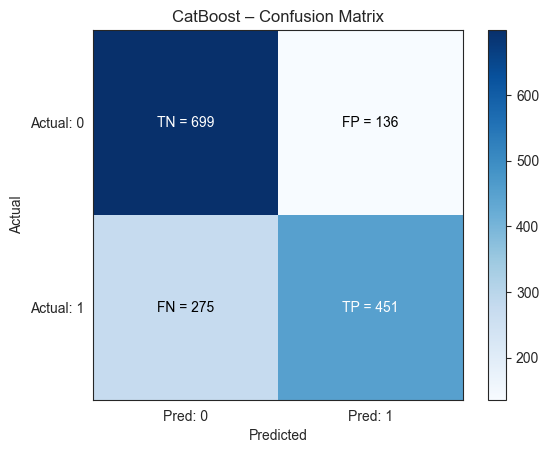

CatBoost – TN: 699, FP: 136, FN: 275, TP: 451
[LightGBM] [Info] Number of positive: 3004, number of negative: 3240
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 6244, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.481102 -> initscore=-0.075629
[LightGBM] [Info] Start training from score -0.075629


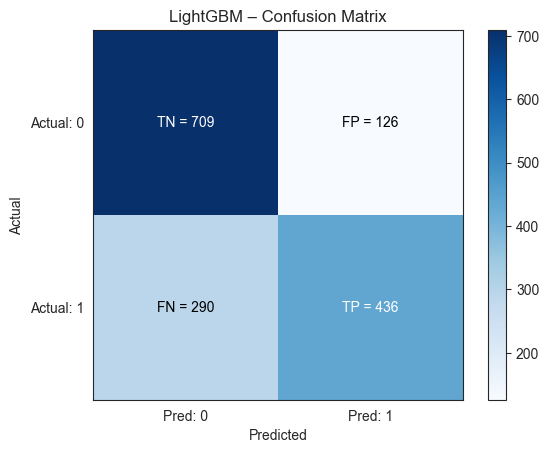

LightGBM – TN: 709, FP: 126, FN: 290, TP: 436


In [67]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Pilih dua model terbaik
best_models = {
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

for name, model in best_models.items():
    # Pipeline
    pipe = Pipeline([
        ("preprocessing", preprocess),
        ("clf", model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Plot manual dengan label TN/FP/FN/TP
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap="Blues")
    
    ax.set_xticks(np.arange(2))
    ax.set_yticks(np.arange(2))
    ax.set_xticklabels(["Pred: 0", "Pred: 1"])
    ax.set_yticklabels(["Actual: 0", "Actual: 1"])
    
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} – Confusion Matrix")
    
    # Label angka & tipe prediksi
    labels = [
        [f"TN = {tn}", f"FP = {fp}"],
        [f"FN = {fn}", f"TP = {tp}"]
    ]
    
    for i in range(2):
        for j in range(2):
            ax.text(j, i, labels[i][j],
                    ha="center", va="center",
                    color="white" if cm[i, j] > cm.max()/2 else "black")
    
    plt.colorbar(im)
    plt.show()
    
    print(f"{name} – TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")


Dari confusion matrix CatBoost tadi:
- TN (699) → Nasabah diprediksi tidak akan buka deposito, dan memang tidak buka → ✅ tidak buang biaya kampanye.
- FP (136) → Nasabah diprediksi akan buka deposito, tapi kenyataannya tidak buka → ❌ biaya kampanye terbuang untuk 136 orang ini.
- FN (275) → Nasabah diprediksi tidak akan buka deposito, tapi kenyataannya buka → ❌ kehilangan peluang pendapatan dari 275 orang.
- TP (451) → Nasabah diprediksi akan buka deposito, dan memang buka → ✅ kampanye berhasil tepat sasaran.

Model CatBoost sudah mampu mengarahkan kampanye ke target yang cukup tepat, dengan False Positive (FP) lebih sedikit (136) dibanding False Negative (FN) yang lebih tinggi (275). Hal ini menunjukkan model cenderung berhati-hati dalam memprediksi calon nasabah sebagai “akan buka deposito”, sehingga pemborosan biaya kampanye dapat ditekan, meskipun masih ada peluang bisnis yang terlewat karena FN cukup besar. Untuk meminimalkan kerugian akibat salah sasaran kampanye, strategi selanjutnya adalah fokus mengurangi jumlah FP agar biaya pemasaran tidak terbuang untuk calon nasabah yang tidak tertarik. Langkah yang dapat dilakukan antara lain dengan meningkatkan precision model melalui penyesuaian threshold probabilitas prediksi, sehingga hanya nasabah dengan peluang tinggi yang akan dihubungi. Selain itu, hasil analisis faktor-faktor penting dari model dapat dimanfaatkan untuk menyusun segmentasi target yang lebih spesifik, seperti memprioritaskan nasabah dengan profil demografis dan riwayat interaksi yang paling relevan. Pendekatan ini diharapkan mampu menjaga akurasi prediksi, mengoptimalkan sumber daya pemasaran, dan pada akhirnya meningkatkan rasio keberhasilan kampanye deposito.

## Hyperparameter Tuning Model

Karena FN dua kali lipat dari FP yang dimana Nasabah memprediksi tidak buka dan kenyataannya buka yang akan menyebabkan kehilangan peluang lebih tinggi dari biaya kampanye yang terbuang, maka kita lakukan tuning untuk menurunkan FN ini agar mendapatkan peluang deposit yang lebih tinggi

Best params: {'clf__auto_class_weights': 'Balanced', 'clf__bagging_temperature': 0, 'clf__depth': 8, 'clf__iterations': 200, 'clf__l2_leaf_reg': 10, 'clf__learning_rate': 0.03, 'clf__random_strength': 0.5}


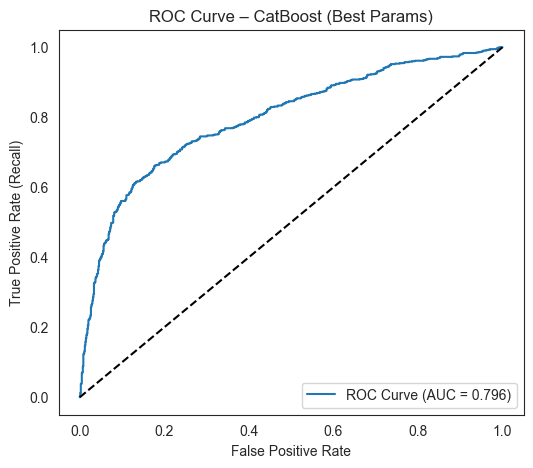

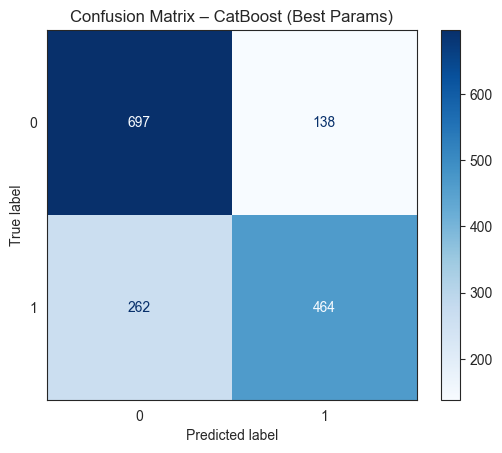

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import numpy as np

# === 1) Pipeline CatBoost dengan preprocessing kita ===
pipe_cat = Pipeline([
    ("preprocessing", preprocess),
    ("clf", CatBoostClassifier(verbose=0, random_state=42, eval_metric='AUC'))
])

# === 2) Hyperparameter grid ===
param_grid = {
    "clf__depth": [4, 6, 8],
    "clf__learning_rate": [0.03, 0.1],
    "clf__l2_leaf_reg": [3, 10],
    "clf__iterations": [200],
    "clf__random_strength": [0.0, 0.5],
    "clf__bagging_temperature": [0, 1],
    "clf__auto_class_weights": ["Balanced"]
}

grid = GridSearchCV(
    estimator=pipe_cat,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_model = grid.best_estimator_

# === 3) Prediksi probabilitas dan kelas ===
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# === 4) ROC Curve ===
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – CatBoost (Best Params)")
plt.legend(loc="lower right")
plt.show()

# === 5) Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix – CatBoost (Best Params)")
plt.show()


In [90]:
from sklearn.metrics import classification_report, roc_auc_score

# === Model Default ===
cat_default = Pipeline([
    ("preprocessing", preprocess),
    ("clf", CatBoostClassifier(verbose=0, random_state=42))
])
cat_default.fit(X_train, y_train)
y_proba_default = cat_default.predict_proba(X_test)[:, 1]
y_pred_default = cat_default.predict(X_test)

# === Model Tuned (pakai best params dari GridSearch sebelumnya) ===
cat_tuned = grid.best_estimator_
y_proba_tuned = cat_tuned.predict_proba(X_test)[:, 1]
y_pred_tuned = cat_tuned.predict(X_test)

# === ROC AUC Score ===
print("ROC AUC Score Default CatBoost : ", roc_auc_score(y_test, y_proba_default))
print("ROC AUC Score Tuned CatBoost : ", roc_auc_score(y_test, y_proba_tuned))

# === Classification Report ===
print("\nClassification Report Default CatBoost : \n",
      classification_report(y_test, y_pred_default))
print("\nClassification Report Tuned CatBoost : \n",
      classification_report(y_test, y_pred_tuned))


ROC AUC Score Default CatBoost :  0.791246432754326
ROC AUC Score Tuned CatBoost :  0.7964484254631233

Classification Report Default CatBoost : 
               precision    recall  f1-score   support

           0       0.72      0.84      0.77       835
           1       0.77      0.62      0.69       726

    accuracy                           0.74      1561
   macro avg       0.74      0.73      0.73      1561
weighted avg       0.74      0.74      0.73      1561


Classification Report Tuned CatBoost : 
               precision    recall  f1-score   support

           0       0.73      0.83      0.78       835
           1       0.77      0.64      0.70       726

    accuracy                           0.74      1561
   macro avg       0.75      0.74      0.74      1561
weighted avg       0.75      0.74      0.74      1561



Setelah dilakukan tuning, performa model CatBoost mengalami sedikit peningkatan pada nilai ROC AUC dari 0.7912 menjadi 0.7964. Walaupun kenaikannya tipis, hal ini tetap menunjukkan perbaikan kemampuan model dalam membedakan nasabah yang akan dan tidak akan membuka deposito. Nilai ROC AUC yang lebih tinggi mengindikasikan keseimbangan yang sedikit lebih baik antara true positive rate dan false positive rate.

Pada classification report, recall untuk kelas 0 sedikit turun dari 0.84 menjadi 0.83, menunjukkan model sedikit kurang dalam mengenali nasabah yang memang tidak tertarik. Sementara itu, recall untuk kelas 1 meningkat dari 0.62 menjadi 0.64, yang berarti model sedikit lebih sensitif dalam mengenali nasabah yang berpotensi membuka deposito. Precision kelas 1 tetap di angka 0.77, sehingga akurasi prediksi positif tidak berubah.

Dari sisi bisnis, hasil tuning membuat model sedikit lebih agresif dalam mendeteksi nasabah potensial, yang berdampak pada peningkatan jumlah true positive. Namun, karena precision tetap, jumlah false positive kemungkinan tidak banyak berubah sehingga efisiensi biaya kampanye tetap terjaga.

Secara keseluruhan, tuning CatBoost membuat model sedikit lebih sensitif terhadap peluang penjualan, sehingga potensi pendapatan meningkat, walaupun peningkatannya masih kecil. Ke depan, penyesuaian threshold prediksi atau penerapan cost-sensitive learning dapat menjadi strategi untuk menyeimbangkan antara efisiensi biaya kampanye dan peningkatan jumlah nasabah potensial yang berhasil dijangkau.

## Feature Importances

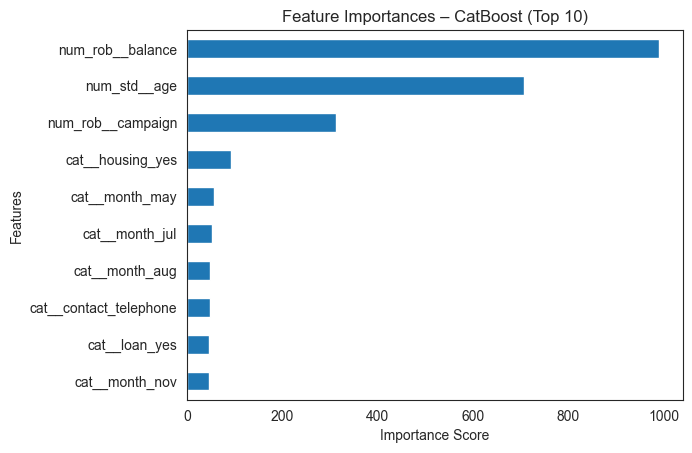

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Ambil nama fitur dari preprocessing pipeline
feature_names = pipe.named_steps["preprocessing"].get_feature_names_out()

# Ambil nilai feature importance dari CatBoost
importances = pipe.named_steps["clf"].feature_importances_

# Buat Series dan ambil 10 teratas
coef1 = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

# Plot horizontal bar chart
coef1.plot(kind='barh', title='Feature Importances – CatBoost (Top 10)')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # supaya ranking 1 di atas
plt.show()


Berdasarkan hasil feature importance, fokus strategi pemasaran ke depan dapat diarahkan pada tiga faktor utama: `balance`, `age`, dan `campaign`. Nasabah dengan saldo tinggi dan usia tertentu yang historisnya lebih responsif terhadap penawaran dapat diprioritaskan sebagai target utama. Jumlah kontak (`campaign`) yang dilakukan juga perlu dioptimalkan — hindari terlalu banyak panggilan pada nasabah yang kemungkinan kecil merespons, agar biaya kampanye lebih efisien. Sementara itu, fitur dengan pengaruh lebih kecil seperti bulan kontak, kepemilikan rumah, dan status pinjaman tetap dapat digunakan sebagai faktor pendukung segmentasi, misalnya untuk menyusun penawaran yang lebih relevan di waktu dan konteks yang tepat. Pendekatan ini diharapkan mampu meningkatkan konversi sambil menekan biaya pemasaran.

## Conclusion & Recommendation

In [77]:
print("\nClassification Report Tuned CatBoost : \n",
      classification_report(y_test, y_pred_tuned))


Classification Report Tuned CatBoost : 
               precision    recall  f1-score   support

           0       0.72      0.86      0.78       835
           1       0.79      0.61      0.69       726

    accuracy                           0.75      1561
   macro avg       0.76      0.74      0.74      1561
weighted avg       0.75      0.75      0.74      1561



### Konklusi

1. Model terbaik yang dipakai adalah CatBoost dengan nilai ROC AUC sebesar 0.7912 dan F1-score 0.70, yang mengungguli model lain dalam hal keseimbangan antara precision dan recall, serta memiliki kemampuan yang baik dalam menangkap calon nasabah potensial.
2. Setelah dilakukan tuning, performa model CatBoost naik tipis dengan ROC AUC menjadi 0.7964 dan recall kelas positif meningkat dari 0.62 menjadi 0.64, sementara precision kelas positif tetap di angka 0.77. Hal ini menunjukkan model menjadi sedikit lebih sensitif dalam mendeteksi nasabah potensial tanpa mengorbankan ketepatan prediksi.
3. Saldo nasabah (balance), usia (age), dan jumlah kontak kampanye (campaign) merupakan tiga variabel paling berpengaruh dalam prediksi. Faktor tambahan seperti bulan kontak, kepemilikan rumah, dan status pinjaman juga berperan namun dengan kontribusi yang lebih kecil, sehingga tetap relevan untuk segmentasi target yang lebih efektif.
4. Berdasarkan classification report, jika model CatBoost yang sudah dituning ini digunakan untuk memfilter atau menyaring daftar kandidat, maka model dapat mengurangi 86% kandidat yang tidak tertarik untuk tidak di-approach, dan dapat menangkap 61% dari seluruh kandidat yang tertarik (berdasarkan recall positifnya). Model ini memiliki ketepatan prediksi kandidat tertarik sebesar 79% (precision), yang berarti setiap kali model memprediksi seorang kandidat tertarik, kemungkinan prediksi tersebut benar adalah 79%. Namun, masih akan ada sekitar 14% kandidat yang sebenarnya tidak tertarik tetapi diprediksi sebagai tertarik (false positive) dari keseluruhan kandidat yang tidak tertarik.

### Rekomendasi

1. Gunakan model CatBoost yang sudah dituning untuk memfilter daftar kandidat, karena mampu mengurangi 86% kandidat yang tidak tertarik untuk tidak di-approach serta menangkap 61% dari seluruh kandidat yang tertarik (recall positif).
2. Prioritaskan kandidat yang diprediksi tertarik oleh model, karena precision mencapai 79%, artinya hampir 8 dari 10 prediksi kandidat tertarik benar-benar akurat.
3. Antisipasi false positive sebesar 14% dengan strategi komunikasi dan penawaran yang hemat biaya, misalnya penawaran tahap awal berbasis edukasi sebelum promosi langsung.
4. Gunakan hasil segmentasi (saldo tinggi, usia tertentu, riwayat kontak) untuk membuat penawaran term deposit yang lebih personal, seperti tenor fleksibel untuk nasabah muda atau bunga lebih tinggi untuk nasabah dengan saldo besar.
5. Fokuskan kampanye pada waktu yang tepat, yaitu bulan-bulan dengan tingkat respons historis lebih tinggi, untuk efisiensi tenaga pemasaran dan biaya.
6. Lakukan evaluasi dan retraining model secara berkala agar akurasi tetap terjaga seiring perubahan perilaku nasabah dan kondisi pasar.
7. Coba teknik oversampling alternatif seperti SMOTENC atau ADASYN untuk meningkatkan recall kelas positif sehingga lebih banyak kandidat potensial dapat dijaring.
8. Analisis kandidat yang salah diprediksi (error analysis) untuk memahami karakteristiknya dan menyesuaikan strategi kampanye agar lebih presisi.

